In [1]:
def prime_number_detector(num):

    import math

    if num in [0, 1]:
        return False

    for i in range(2, int(math.sqrt(num)) + 1):

        if num % i == 0:
            return False
    
    return True

In [2]:
test_nums = [2, 3, 5, 7, 9, 13, 23, 111, 4]
test_filtered = filter(prime_number_detector, test_nums)
for i in test_filtered:
    print(i, end=' ')

2 3 5 7 13 23 

In [3]:
import random

random.seed(42)
rand_nums = random.sample(range(10000000), 3000000)

## The Python Way

In [16]:
%%timeit -r 10
filtered = filter(prime_number_detector, rand_nums)
filtered_list = list(filtered)
filtered_list

32.5 s ± 102 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [17]:
str_filtered_list = [(str(x) + '\n') for x in filtered_list]
str_filtered_list

['2341057\n',
 '1719583\n',
 '445199\n',
 '9886237\n',
 '2608513\n',
 '1556017\n',
 '5960453\n',
 '6637601\n',
 '2396987\n',
 '9790057\n',
 '3679591\n',
 '790481\n',
 '2564251\n',
 '4476583\n',
 '8517169\n',
 '6273233\n',
 '2109911\n',
 '9580513\n',
 '6897151\n',
 '3965789\n',
 '36161\n',
 '8164991\n',
 '2597059\n',
 '3185957\n',
 '9800873\n',
 '2011363\n',
 '1217071\n',
 '131249\n',
 '3533779\n',
 '2726327\n',
 '5573147\n',
 '5038571\n',
 '8508103\n',
 '9730529\n',
 '7801207\n',
 '3262081\n',
 '7425149\n',
 '2321531\n',
 '3879923\n',
 '8961107\n',
 '7190929\n',
 '4668371\n',
 '4232413\n',
 '7890439\n',
 '675419\n',
 '3344717\n',
 '9461839\n',
 '8224219\n',
 '4679639\n',
 '4635017\n',
 '9314311\n',
 '7519121\n',
 '4936453\n',
 '9756883\n',
 '8907391\n',
 '4545223\n',
 '3630331\n',
 '3010529\n',
 '8961299\n',
 '4163953\n',
 '3786401\n',
 '9540019\n',
 '1664863\n',
 '2916107\n',
 '9260893\n',
 '2626181\n',
 '6853787\n',
 '9820201\n',
 '2698193\n',
 '1944841\n',
 '9248693\n',
 '43037\n',


In [18]:
%%timeit -r 10
with open('text_files/prime_nums/prime_python.txt', 'w') as f:
    f.writelines(str_filtered_list)

52.6 ms ± 3.05 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


## The Spark Way

In [4]:
import findspark
findspark.init()

In [5]:
from pyspark import SparkContext, SparkConf

spark_conf = SparkConf().setMaster('local').setAppName('Prime Number Detector')
spark_context = SparkContext().getOrCreate(spark_conf)

rand_nums_rdd = spark_context.parallelize(rand_nums)

In [31]:
%%timeit -r 10
filtered_rdd = rand_nums_rdd.filter(prime_number_detector)
filtered_rdd.collect()

13.4 s ± 596 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [16]:
# timeit doesn't return the values for saving into files
# This cell is only for getting the values for that next step
filtered_rdd = rand_nums_rdd.filter(prime_number_detector)
filtered_rdd.take(5)

[2341057, 1719583, 445199, 9886237, 2608513]

In [19]:
filtered_rdd.getNumPartitions()

1

In [18]:
filtered_rdd = filtered_rdd.repartition(1)

In [20]:
%%timeit -r 10
import shutil
shutil.rmtree('text_files/prime_nums/prime_spark')
filtered_rdd.saveAsTextFile('text_files/prime_nums/prime_spark') 

1.08 s ± 19.8 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [16]:
spark_context.stop()

In [22]:
from matplotlib import pyplot as plt
import numpy as np

## Comparison in the detection task

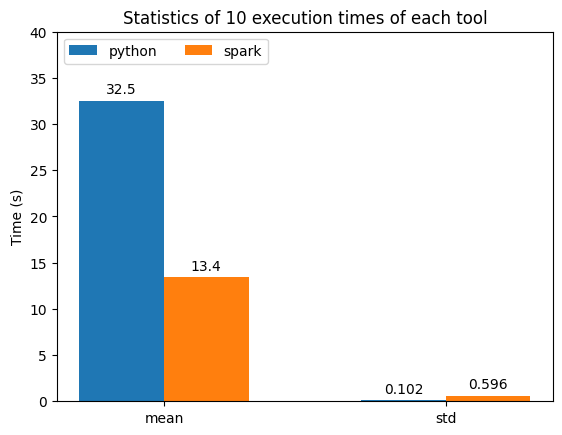

In [27]:
# 32.5 s ± 102 ms
# 13.4 s ± 596 ms
stats = ['mean', 'std']

exec_query_data = {
    'python': [32.5, 0.102],
    'spark': [13.4, 0.596]
}

x = np.arange(len(stats))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for key, values in exec_query_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, values, width, label=key)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (s)')
ax.set_title('Statistics of 10 execution times of each tool')
ax.set_xticks(x + width / 2, stats)

ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 40)

plt.show()

## Comparison in file saving task

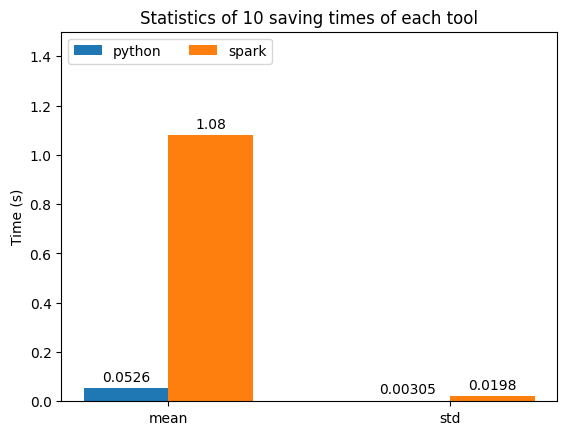

In [29]:
# 52.6 ms ± 3.05 ms
# 1.08 s ± 19.8 ms
stats = ['mean', 'std']

saving_query_data = {
    'python': [0.0526, 0.00305],
    'spark': [1.08, 0.0198]
}

x = np.arange(len(stats))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for key, values in saving_query_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, values, width, label=key)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (s)')
ax.set_title('Statistics of 10 saving times of each tool')
ax.set_xticks(x + width / 2, stats)

ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1.5)

plt.show()

## Overall Comparison

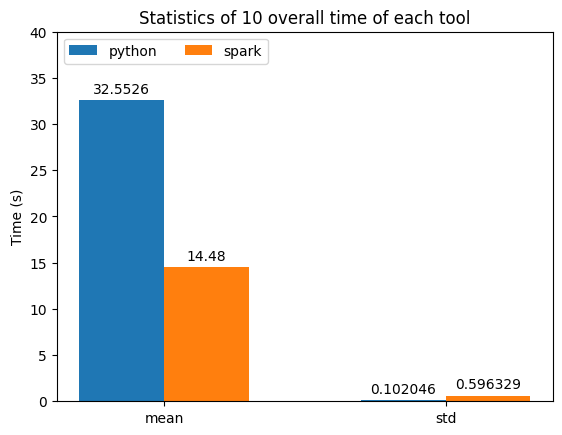

In [36]:
# 52.6 ms ± 3.05 ms
# 1.08 s ± 19.8 ms
stats = ['mean', 'std']

overall_python_data = [
    saving_query_data['python'][0] + exec_query_data['python'][0],
    np.sqrt(np.square(saving_query_data['python'][1]) + np.square(exec_query_data['python'][1]))
]

overall_spark_data = [
    saving_query_data['spark'][0] + exec_query_data['spark'][0],
    np.sqrt(np.square(saving_query_data['spark'][1]) + np.square(exec_query_data['spark'][1]))
]

overall_query_data = {
    'python': overall_python_data,
    'spark': overall_spark_data
}

x = np.arange(len(stats))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for key, values in overall_query_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, values, width, label=key)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (s)')
ax.set_title('Statistics of 10 overall time of each tool')
ax.set_xticks(x + width / 2, stats)

ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 40)

plt.show()